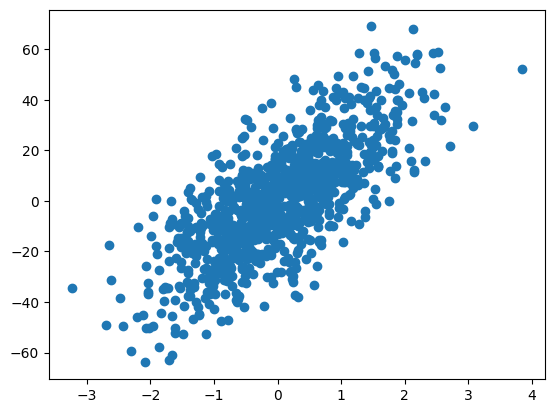

In [24]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt


X, y = make_regression(n_samples=1000, n_features=1, noise=15, random_state=42)

plt.scatter(X[:, 0], y)

3.8527314906547208
-3.2412673400690726
1.0
0.0


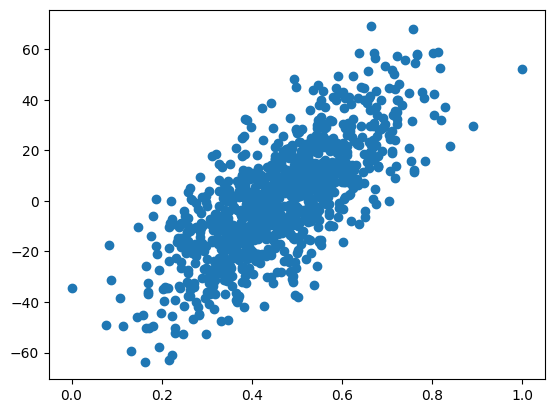

In [25]:
# normalização
print(X.max())
print(X.min())

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler1 = MinMaxScaler()
scaler1.fit(X)
X_normalizado = scaler1.transform(X)
print(X_normalizado.max())
print(X_normalizado.min())

plt.scatter(X_normalizado[:, 0], y)

In [27]:
# padronização
scaler2 = StandardScaler()
scaler2.fit(X)
X_padronizado = scaler2.transform(X)

X_padronizado.std()

1.0

In [30]:
# one hot encode
import pandas as pd

dados = {
    'estados': ['SP', 'MG', 'MG', 'RJ', 'RJ', 'RJ', 'BA', 'BA']
}

df = pd.DataFrame(dados)
pd.get_dummies(df, dtype=float)

,estados_BA,estados_MG,estados_RJ,estados_SP
0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
5,0.0,0.0,1.0,0.0
6,1.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0


In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)


LinearRegression()

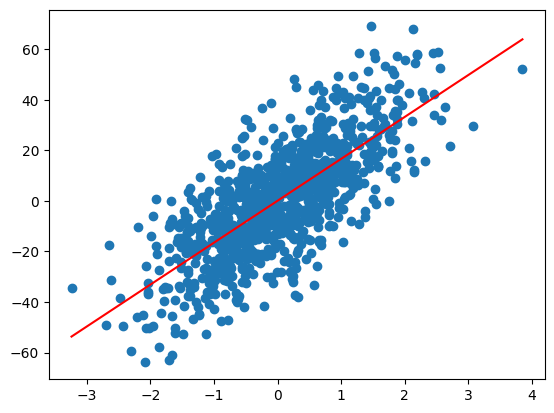

In [33]:
import numpy as np
X_teste = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(X_teste)

plt.scatter(X[:, 0], y)
plt.plot(X_teste, y_pred, color='red')

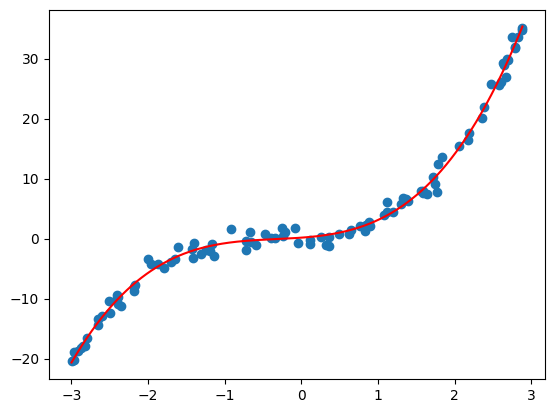

In [52]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

X = np.random.rand(100, 1) * 6 - 3 # entre 3 e -3
y = X**3 + X**2 + X + (np.random.randn(100, 1)*1)


#características polinomiais
car = PolynomialFeatures(degree=3, include_bias=False)
X_polinomial = car.fit_transform(X)

model = LinearRegression()
model.fit(X_polinomial, y)

X_teste = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
X_teste_poli = car.transform(X_teste)
y_pred = model.predict(X_teste_poli)

plt.scatter(X, y)
plt.plot(X_teste, y_pred, color='red')

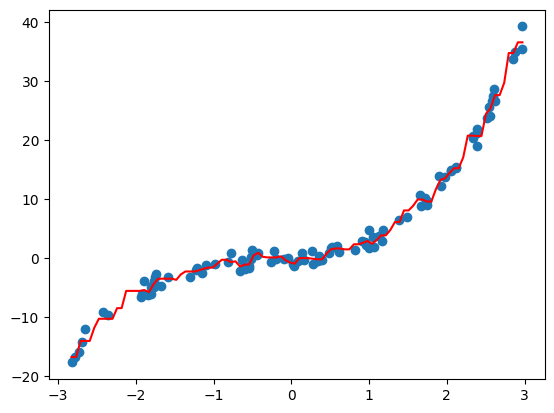

In [58]:
from sklearn.neighbors import KNeighborsRegressor

X, y = make_regression(n_samples=1000, n_features=1, noise=15, random_state=42)

X = np.random.rand(100, 1) * 6 - 3 # entre 3 e -3
y = X**3 + X**2 + X + (np.random.randn(100, 1)*1)


model = KNeighborsRegressor(n_neighbors=3)
model.fit(X, y)

X_teste = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(X_teste)

plt.scatter(X, y)
plt.plot(X_teste, y_pred, color='red')

In [59]:
from sklearn.datasets import fetch_california_housing
dados = fetch_california_housing()
X = dados.data
y = dados.target

In [68]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
scaler = StandardScaler()
X_treino = scaler.fit_transform(X_treino)
X_teste = scaler.transform(X_teste)

In [71]:
lr = LinearRegression()
lr.fit(X_treino, y_treino)

knn = KNeighborsRegressor()
knn.fit(X_treino, y_treino)

KNeighborsRegressor()

In [72]:
y_pred_lr = lr.predict(X_teste)
y_pred_knn = knn.predict(X_teste)

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(mean_absolute_error(y_teste, y_pred_lr))
print(mean_absolute_error(y_teste, y_pred_knn))

0.5332001304956562
0.4461535271317829


In [78]:
print(mean_squared_error(y_teste, y_pred_lr))
print(mean_squared_error(y_teste, y_pred_knn))

0.5558915986952443
0.4324216146043236


In [80]:
print(r2_score(y_teste, y_pred_lr))
print(r2_score(y_teste, y_pred_knn))

0.5757877060324508
0.6700101862970989
